Possible quantitative performance metrics can include
* return
* risk (variance)
* value at risk (VaR)

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the Excel file
file_path = 'JPNU_20241206.xlsx'
df = pd.read_excel(file_path)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Ensure the 'Effective date' column is in datetime format with error handling
df['Close'] = pd.to_datetime(df['Close'], format='%m/%d/%Y', errors='coerce')

# Drop rows with NaT values in the date column
df.dropna(subset=['Close'], inplace=True)

# Set the date as the index
df.set_index('Close', inplace=True)

# Check if the DataFrame is empty after dropping NaT values
if df.empty:
    print("Warning: The DataFrame is empty after filtering out NaT values. Exiting.")
else:
    # Resample data to get the last entry of each year (annual returns)
    annual_data = df.resample('YE').last()

    # Set start year as the first available January 1
    january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]

    if not january_first_data.empty:
        start_year = january_first_data.index.year.min()
    else:
        print("Warning: No January 1 entries found. Unable to determine start year.")
        start_year = df.index.year.min()  # Fallback to the earliest available year

    # Filter the data to start from January 1 of the first year and end on December 31, 2023
    filtered_data = df[(df.index >= pd.Timestamp(f'{start_year}-01-01')) & (df.index <= pd.Timestamp('2023-12-31'))]

    # Check if filtered data is empty before proceeding
    if filtered_data.empty:
        print("Warning: No data available after filtering. Exiting.")
    else:
        # Re-sample the filtered data to get the last value of each year
        annual_data = filtered_data.resample('YE').last()

        # Calculate the annual returns: (ending_value - starting_value) / starting_value
        annual_return = annual_data.pct_change().dropna()

        # Calculate daily returns
        daily_return = filtered_data.pct_change().dropna()

        # Calculate annual volatility (standard deviation of daily returns * sqrt(252))
        annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

        # Print the results
        print(f"Annual Returns from {start_year} to 2023:\n{annual_return}")
        print(f"Annual Volatility from {start_year} to 2023:\n{annual_volatility}")

In [ ]:
def calculate_returns_and_volatility(file_paths):
    for file_path in file_paths:
        # Load the Excel file
        df = pd.read_excel(file_path)

        # Try to identify the date column automatically
        date_column = None
        for col in df.columns:
            if 'date' in col.lower():  # Look for any column with 'date' in its name (case-insensitive)
                date_column = col
                break
        if date_column is None:
            # Fall back to using the first column if no column with 'date' in the name is found
            date_column = df.columns[0]

        # Convert the identified date column to datetime format with error handling
        df[date_column] = pd.to_datetime(df[date_column], format='%m/%d/%Y', errors='coerce')

        # Check for NaT values that may indicate parsing issues
        if df[date_column].isna().any():
            print(f"Warning: There are NaT values in the date column of {file_path}.")
            print(df[df[date_column].isna()])  # Print rows with NaT

        # Set the identified date column as the index
        df.set_index(date_column, inplace=True)

        # Set start year as the first available January 1
        january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]
        start_year = january_first_data.index.year.min()

        # Filter the data to start from January 1 of the first year and end on December 31, 2023
        filtered_data = df[(df.index >= pd.Timestamp(f'{start_year}-01-01')) & (df.index <= pd.Timestamp('2023-12-31'))]

        # Re-sample the filtered data to get the last value of each year
        annual_data = filtered_data.resample('YE').last()

        # Calculate the annual returns: (ending_value - starting_value) / starting_value
        annual_return = annual_data.pct_change().dropna()

        # Calculate daily returns
        daily_return = filtered_data.pct_change().dropna()

        # Calculate annual volatility (standard deviation of daily returns * sqrt(252))
        annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

        # Print the results for each file
        file_name = os.path.basename(file_path)
        print(f"Results for {file_name}:")
        print(f"Annual Returns from {start_year} to 2023:\n{annual_return}")
        print(f"Annual Volatility from {start_year} to 2023:\n{annual_volatility}")
        print("-" * 50)

In [ ]:
file_path = 'NDX_20241202.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Effective date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index
df.set_index('Date', inplace=True)

# Resample data to get the last entry of each year (annual returns)
annual_data = df.resample('YE').last()

# Set start year as the first available January 1
january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]
start_year = january_first_data.index.year.min()

# Filter the data to start from January 1 of the first year and end on December 31, 2023
filtered_data = df[(df.index >= pd.Timestamp(f'2015-01-02')) & (df.index <= pd.Timestamp('2023-12-31'))]

# Re-sample the filtered data to get the last value of each year
annual_data = filtered_data.resample('YE').last()

# Calculate the annual returns: (ending_value - starting_value) / starting_value
annual_return = annual_data.pct_change().dropna()

# Calculate daily returns
daily_return = filtered_data.pct_change().dropna()

# Calculate annual volatility (standard deviation of daily returns * sqrt(252))
annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

# Print the results
print(f"Annual Returns from {start_year} to 2023:\n{annual_return}")
print(f"Annual Volatility from {start_year} to 2023:\n{annual_volatility}")

Annual Returns from 2015 to 2023:
               Close
Date                
2016-12-31  0.058858
2017-12-31  0.315156
2018-12-31 -0.010390
2019-12-31  0.379641
2020-12-31  0.475802
2021-12-31  0.266273
2022-12-31 -0.329675
2023-12-31  0.538053
Annual Volatility from 2015 to 2023:
         Close
Date          
2015  0.176118
2016  0.161578
2017  0.102759
2018  0.227226
2019  0.163390
2020  0.363645
2021  0.184813
2022  0.324904
2023  0.181163


In [ ]:
def calculate_returns_and_volatility(file_paths):
    # Initialize dictionaries
    annual_returns_data = {"Year": [], "Files": {}}
    annual_volatility_data = {"Year": [], "Files": {}}

    for file_path in file_paths:
        print(f"Processing file: {file_path}")  # Debug

        # Load the Excel file
        df = pd.read_excel(file_path)

        # Identify the date column
        date_column = next((col for col in df.columns if 'date' in col.lower()), df.columns[0])
        df[date_column] = pd.to_datetime(df[date_column], format='%m/%d/%Y', errors='coerce')

        # Handle invalid dates
        if df[date_column].isna().any():
            print(f"Warning: Invalid dates found in file {file_path}. Skipping rows with NaT...")
            df.dropna(subset=[date_column], inplace=True)

        # Set date column as index
        df.set_index(date_column, inplace=True)

        # Determine the start year
        january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]
        start_year = january_first_data.index.year.min()
        if start_year is None or pd.isna(start_year):
            print(f"Warning: No valid start year found for file {file_path}. Skipping...")
            continue

        print(f"Start year: {start_year}")  # Debug

        # Filter data and resample
        filtered_data = df[(df.index >= pd.Timestamp(f'{start_year}-01-01')) & (df.index <= pd.Timestamp('2023-12-31'))]
        annual_data = filtered_data.resample('YE').last()
        annual_return = annual_data.pct_change().dropna()
        daily_return = filtered_data.pct_change().dropna()
        annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

        # Collect results
        file_name = os.path.basename(file_path).split('.')[0]
        annual_returns_data["Year"] = list(annual_return.index.year)
        annual_returns_data["Files"][file_name] = list(annual_return.values.flatten())
        annual_volatility_data["Year"] = list(annual_volatility.index)
        annual_volatility_data["Files"][file_name] = list(annual_volatility.values.flatten())

    print("Annual Returns Data:", annual_returns_data)
    print("\nAnnual Volatility Data:", annual_volatility_data)
    return annual_returns_data, annual_volatility_data

In [ ]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# Specify the folder path
folder_path = '/content/drive/My Drive/Thesis/Indices'

# List all files in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.xlsx')]

# Print file paths
print("File paths:", file_paths)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File paths: ['/content/drive/My Drive/Thesis/Indices/DJIMID_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/SHX_20211021.xlsx', '/content/drive/My Drive/Thesis/Indices/IMUS_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/IMXLD_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/W1DOW_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/SPX_20241022.xlsx', '/content/drive/My Drive/Thesis/Indices/NDX_20241202.xlsx', '/content/drive/My Drive/Thesis/Indices/JPNU_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/JKIID_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/WALLE_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/BDDSESD_20241209.xlsx', '/content/drive/My Drive/Thesis/Indices/DJIAP_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/DJICHK_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/GS100_20241206.x

In [ ]:
annual_returns, annual_volatility = calculate_returns_and_volatility(file_paths)

Processing file: /content/drive/My Drive/Thesis/Indices/DJIMID_20241021.xlsx
Start year: 1997
Processing file: /content/drive/My Drive/Thesis/Indices/SHX_20211021.xlsx
Processing file: /content/drive/My Drive/Thesis/Indices/IMUS_20241021.xlsx
Start year: 1997
Processing file: /content/drive/My Drive/Thesis/Indices/IMXLD_20241021.xlsx
Start year: 2001
Processing file: /content/drive/My Drive/Thesis/Indices/W1DOW_20241021.xlsx
Start year: 2015
Processing file: /content/drive/My Drive/Thesis/Indices/SPX_20241022.xlsx
Start year: 2015
Processing file: /content/drive/My Drive/Thesis/Indices/NDX_20241202.xlsx
Start year: 2015
Processing file: /content/drive/My Drive/Thesis/Indices/JPNU_20241206.xlsx
Processing file: /content/drive/My Drive/Thesis/Indices/JKIID_20241206.xlsx
Processing file: /content/drive/My Drive/Thesis/Indices/WALLE_20241206.xlsx
Start year: 2008
Processing file: /content/drive/My Drive/Thesis/Indices/BDDSESD_20241209.xlsx
Start year: 2015
Processing file: /content/drive/M

In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.1754, 0.1076, 0.1874, 0.1480, 0.2851, 0.3021, 0.4468, 0.2940],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "NDX (Con.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SPX (Con.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "W1DOW (Con.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

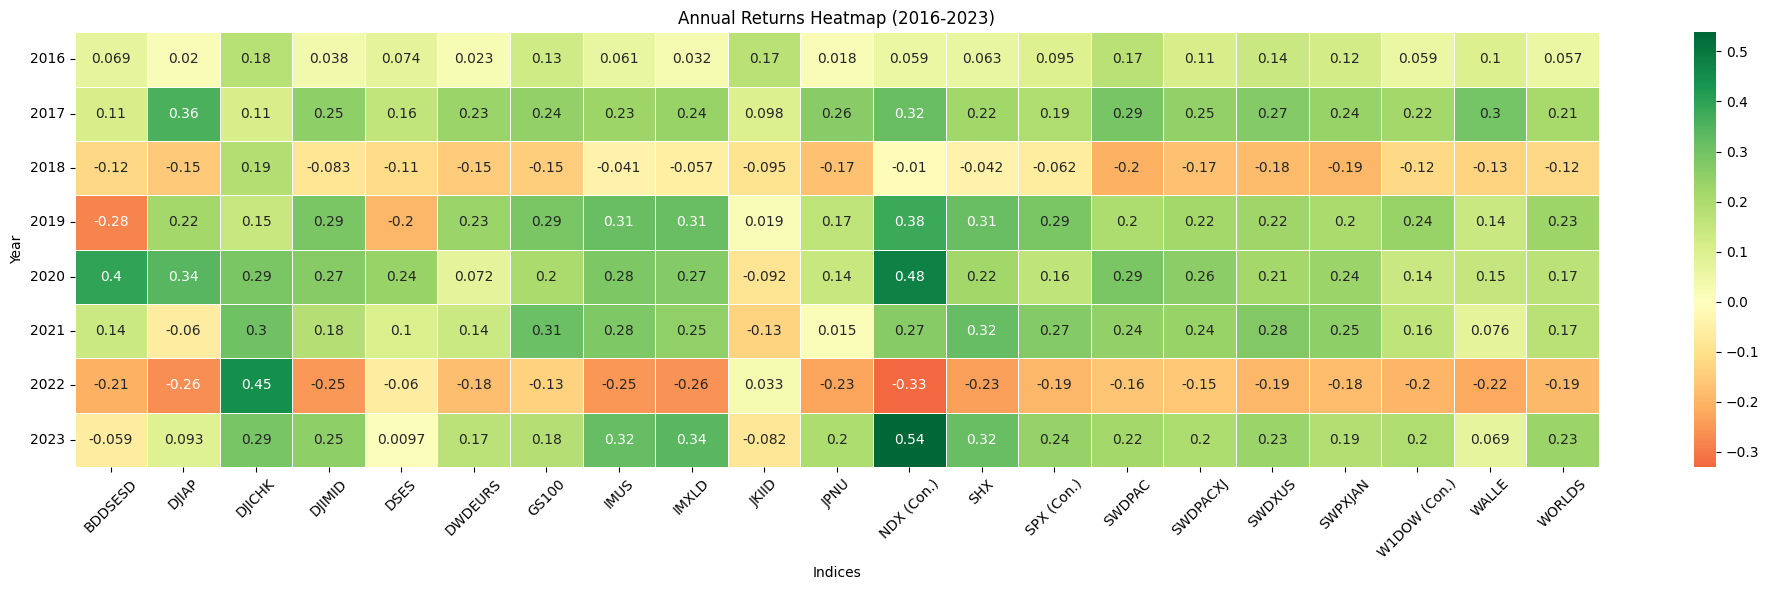

In [ ]:
annual_returns_df = pd.DataFrame(annual_returns_data)

# Set the Year as the index for better plotting
annual_returns_df.set_index("Year", inplace=True)

# Plotting the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(annual_returns_df, annot=True, cmap='RdYlGn', center=0, linewidths=0.5)
plt.title('Annual Returns Heatmap (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
annual_volatility_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    'NDX (Con.)': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    'SPX (Con.)': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    "W1DOW (Con.)": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


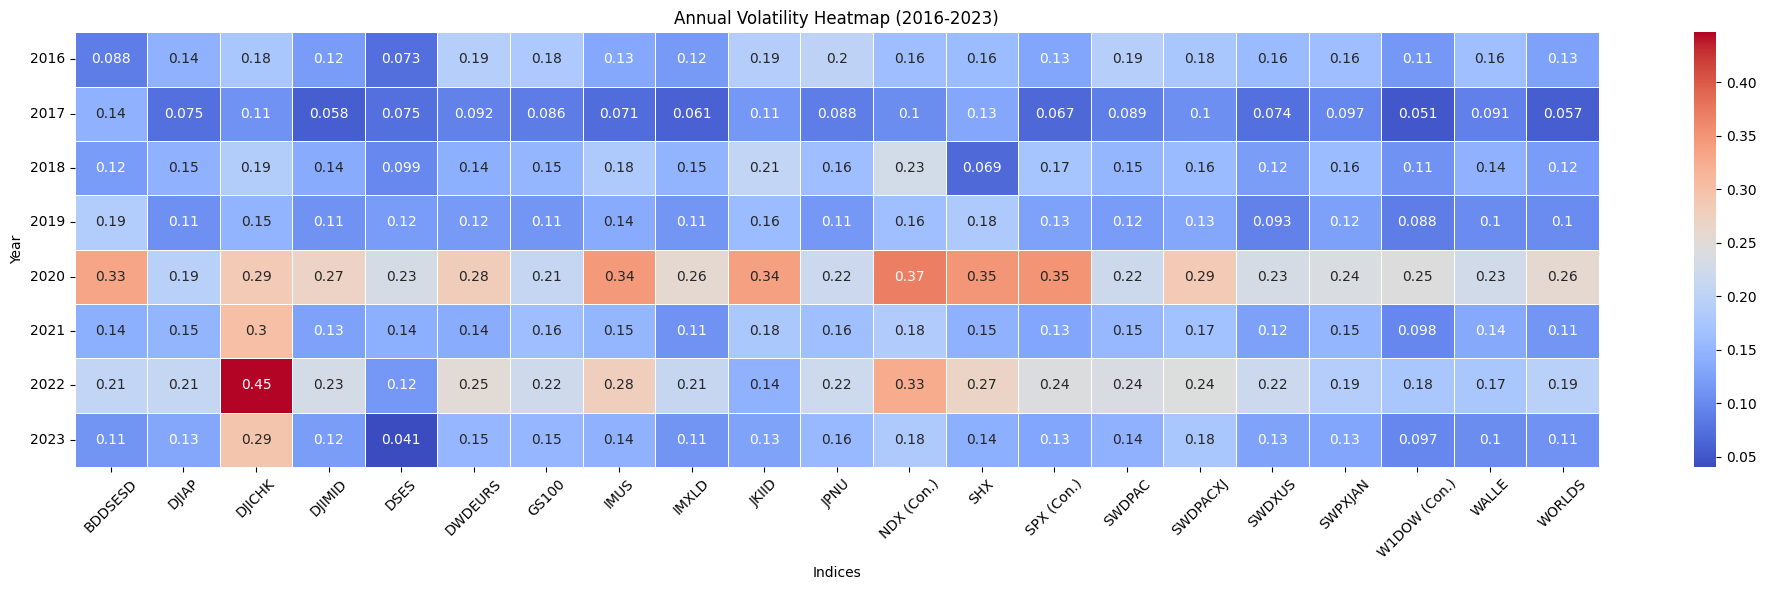

In [ ]:
annual_volatility_df = pd.DataFrame(annual_volatility_data)

# Set the Year as the index for better plotting
annual_volatility_df.set_index("Year", inplace=True)

# Plotting the heatmap with a green-to-red colorscale
plt.figure(figsize=(20, 6))
sns.heatmap(annual_volatility_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Annual Volatility Heatmap (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# **Optimization - Mean-Variance Model**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# Objective function: maximize portfolio return
def portfolio_return(weights):
    return -np.dot(weights, mean_returns)

# Portfolio risk
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [ ]:
def test_Rstar(R_star):

  # Number of assets
  n_assets = len(mean_returns)

  # Constraints
  constraints = [
      {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Weights sum to 1
      {"type": "ineq", "fun": lambda w: R_star - portfolio_risk(w)},  # Risk constraint
  ]

  # Bounds for weights (no short selling)
  bounds = [(0, 1) for _ in range(n_assets)]

  # Initial guess
  init_guess = np.array([1 / n_assets] * n_assets)

  # Optimization
  result = minimize(
      portfolio_return,  # Minimize the negative return
      init_guess,
      method="SLSQP",
      bounds=bounds,
      constraints=constraints,
  )

  # Optimal weights
  optimal_weights = result.x
  optimal_return = -result.fun
  optimal_risk = portfolio_risk(optimal_weights)

  # print("Optimal Weights:", optimal_weights)
  # print("Expected Return:", optimal_return)
  # print("Portfolio Risk:", optimal_risk)

  return optimal_weights

In [ ]:
# Convert data to DataFrames
returns_df = pd.DataFrame(annual_returns_data).set_index("Year")
volatility_df = pd.DataFrame(annual_volatility_data).set_index("Year")

# Calculate average returns and covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

In [ ]:
R_stars = np.linspace(0, 0.3, 61)
print(R_stars)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3  ]


In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "DJIMI": [0.038071, 0.251854, -0.083622, 0.289595, 0.266774, 0.184870, -0.251276, 0.255713],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
}

annual_volatility_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "DJIMI": [0.108120, 0.052541, 0.123993, 0.098559, 0.246109, 0.111318, 0.203516, 0.107602],
    "IMUS": [0.209707, 0.195465, 0.287545, 0.258017, 0.270002, 0.169759, 0.120990, 0.144815],
    "IMXLD": [0.235246, 0.139348, 0.091388, 0.082021, 0.094515, 0.128796, 0.315342, 0.110916],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
}

In [ ]:
islamic_indices_USA = ["DJIMI", "IMUS", "IMXLD", "SHX"]

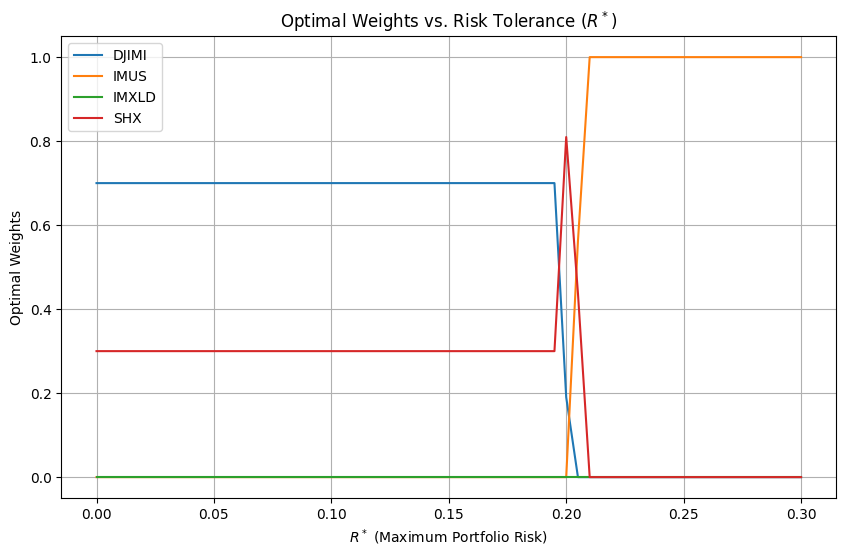

In [ ]:
optimal_weights = []

for r in R_stars:
    weights = test_Rstar(r)
    optimal_weights.append(weights)

optimal_weights = np.array(optimal_weights)

# Plot
plt.figure(figsize=(10, 6))
n_assets = optimal_weights.shape[1]

for i in range(n_assets):
    plt.plot(R_stars, optimal_weights[:, i], label=islamic_indices_USA[i])

plt.title("Optimal Weights vs. Risk Tolerance ($R^*$)")
plt.xlabel("$R^*$ (Maximum Portfolio Risk)")
plt.ylabel("Optimal Weights")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
R_stars = np.linspace(0.16, 0.24, 41)
print(R_stars)

[0.16  0.162 0.164 0.166 0.168 0.17  0.172 0.174 0.176 0.178 0.18  0.182
 0.184 0.186 0.188 0.19  0.192 0.194 0.196 0.198 0.2   0.202 0.204 0.206
 0.208 0.21  0.212 0.214 0.216 0.218 0.22  0.222 0.224 0.226 0.228 0.23
 0.232 0.234 0.236 0.238 0.24 ]


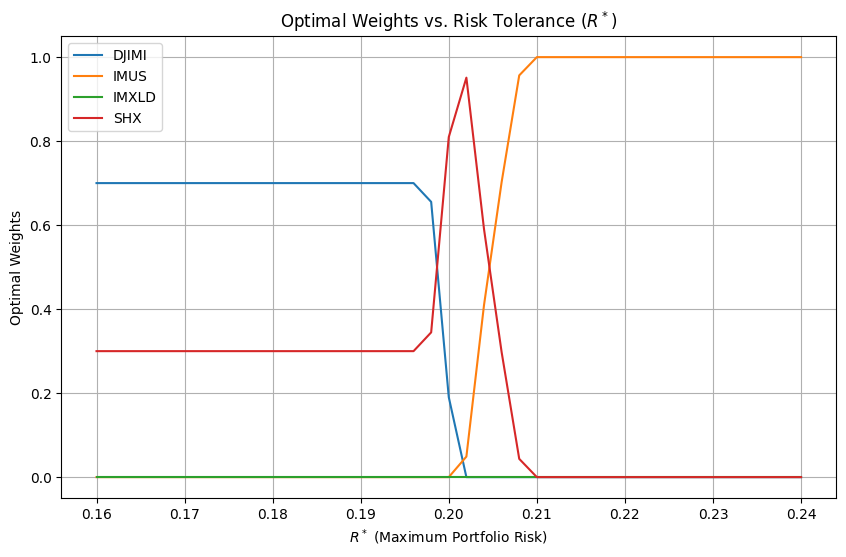

In [ ]:
optimal_weights = []

for r in R_stars:
    weights = test_Rstar(r)
    optimal_weights.append(weights)

optimal_weights = np.array(optimal_weights)

# Plot
plt.figure(figsize=(10, 6))
n_assets = optimal_weights.shape[1]

for i in range(n_assets):
    plt.plot(R_stars, optimal_weights[:, i], label=islamic_indices_USA[i])

plt.title("Optimal Weights vs. Risk Tolerance ($R^*$)")
plt.xlabel("$R^*$ (Maximum Portfolio Risk)")
plt.ylabel("Optimal Weights")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
weights = test_Rstar(0.05)
weights

array([7.00032544e-01, 0.00000000e+00, 2.18923472e-16, 2.99967454e-01])

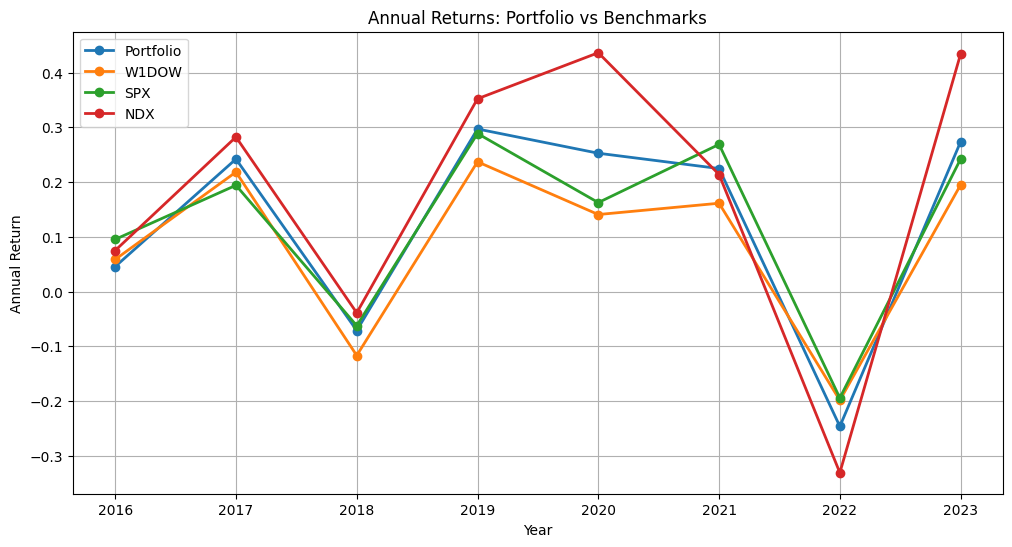

In [ ]:
portfolio_weights = np.array(weights)

annual_returns = {
    "DJIMI": [0.038071, 0.251854, -0.083622, 0.289595, 0.266774, 0.184870, -0.251276, 0.255713],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "NDX": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "W1DOW": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "SPX": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "NDX": [0.075031, 0.282414, -0.038837, 0.352256, 0.436404, 0.213891, -0.331000, 0.434231],
}

# Portfolio assets
portfolio_assets = ["DJIMI", "IMUS", "IMXLD", "SHX"]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Calculate annual returns for portfolio
portfolio_annual_returns = []
for year_index in range(len(years)):
    weighted_return = sum(
        portfolio_weights[i] * annual_returns[asset][year_index] for i, asset in enumerate(portfolio_assets)
    )
    portfolio_annual_returns.append(weighted_return)

# Extract benchmark returns
w1dow_returns = annual_returns["W1DOW"]
spx_returns = annual_returns["SPX"]
ndx_returns = annual_returns["NDX"]

# Plotting
plt.figure(figsize=(12, 6))

# Portfolio
plt.plot(years, portfolio_annual_returns, label="Portfolio", marker="o", linewidth=2)
# Benchmarks
plt.plot(years, w1dow_returns, label="W1DOW", marker="o", linewidth=2)
plt.plot(years, spx_returns, label="SPX", marker="o", linewidth=2)
plt.plot(years, ndx_returns, label="NDX", marker="o", linewidth=2)

# Customize plot
plt.title("Annual Returns: Portfolio vs Benchmarks")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.legend()
plt.grid(True)
plt.show()

## **Optimizer Again: with International Indices**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.1754, 0.1076, 0.1874, 0.1480, 0.2851, 0.3021, 0.4468, 0.2940],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    # "NDX (Con.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    # "SPX (Con.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    # "W1DOW (Con.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

In [ ]:
annual_volatility_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    # 'NDX (Con.)': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    # 'SPX (Con.)': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    # "W1DOW (Con.)": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


In [ ]:
# Objective function: maximize portfolio return
def portfolio_return(weights):
    return -np.dot(weights, mean_returns)

# Portfolio risk
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [ ]:
# Convert data to DataFrames
returns_df = pd.DataFrame(annual_returns_data).set_index("Year")
volatility_df = pd.DataFrame(annual_volatility_data).set_index("Year")

# Calculate average returns and covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

In [ ]:
def test_Rstar(R_star):

  # Number of assets
  n_assets = len(mean_returns)

  # Constraints
  constraints = [
      {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Weights sum to 1
      {"type": "ineq", "fun": lambda w: R_star - portfolio_risk(w)},  # Risk constraint
  ]

  # Bounds for weights (no short selling)
  bounds = [(0, 1) for _ in range(n_assets)]

  # Initial guess
  init_guess = np.array([1 / n_assets] * n_assets)

  # Optimization
  result = minimize(
      portfolio_return,  # Minimize the negative return
      init_guess,
      method="SLSQP",
      bounds=bounds,
      constraints=constraints,
  )

  # Optimal weights
  optimal_weights = result.x
  optimal_return = -result.fun
  optimal_risk = portfolio_risk(optimal_weights)

  # print("Optimal Weights:", optimal_weights)
  # print("Expected Return:", optimal_return)
  # print("Portfolio Risk:", optimal_risk)

  return optimal_weights

In [ ]:
R_stars = np.linspace(0, 0.15, 31)
print(R_stars)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15 ]


In [ ]:
islamic_indices = [
    "BDDSESD", "DJIAP", "DJICHK", "DJIMID", "DSES", "DWDEURS",
    "GS100", "IMUS", "IMXLD", "JKIID", "JPNU", "SHX",
    "SWDPAC", "SWDPACXJ", "SWDXUS", "SWPXJAN", "WALLE", "WORLDS"
]

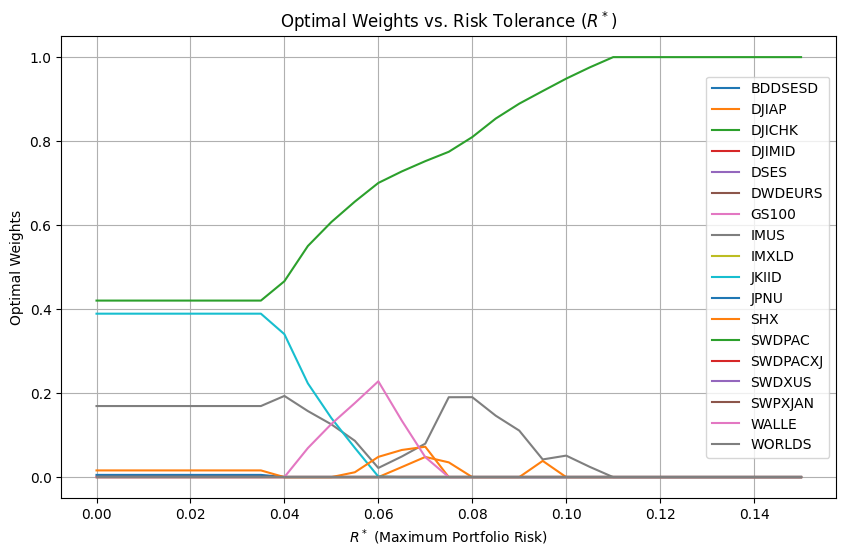

In [ ]:
optimal_weights = []

for r in R_stars:
    weights = test_Rstar(r)
    optimal_weights.append(weights)

optimal_weights = np.array(optimal_weights)

# Plot
plt.figure(figsize=(10, 6))
n_assets = optimal_weights.shape[1]

for i in range(n_assets):
    plt.plot(R_stars, optimal_weights[:, i], label=islamic_indices[i])

plt.title("Optimal Weights vs. Risk Tolerance ($R^*$)")
plt.xlabel("$R^*$ (Maximum Portfolio Risk)")
plt.ylabel("Optimal Weights")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
weights = test_Rstar(0.05)
weights

array([1.02974824e-16, 1.24752087e-16, 6.07314723e-01, 1.49755113e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25635972e-01,
       0.00000000e+00, 1.40600277e-01, 0.00000000e+00, 0.00000000e+00,
       1.93695223e-16, 1.20246531e-16, 9.89277506e-17, 1.00177251e-16,
       1.26449028e-01, 2.03941277e-17])

In [ ]:
annual_volatility_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    'NDX (Con.)': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    'SPX (Con.)': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    "W1DOW (Con.)": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


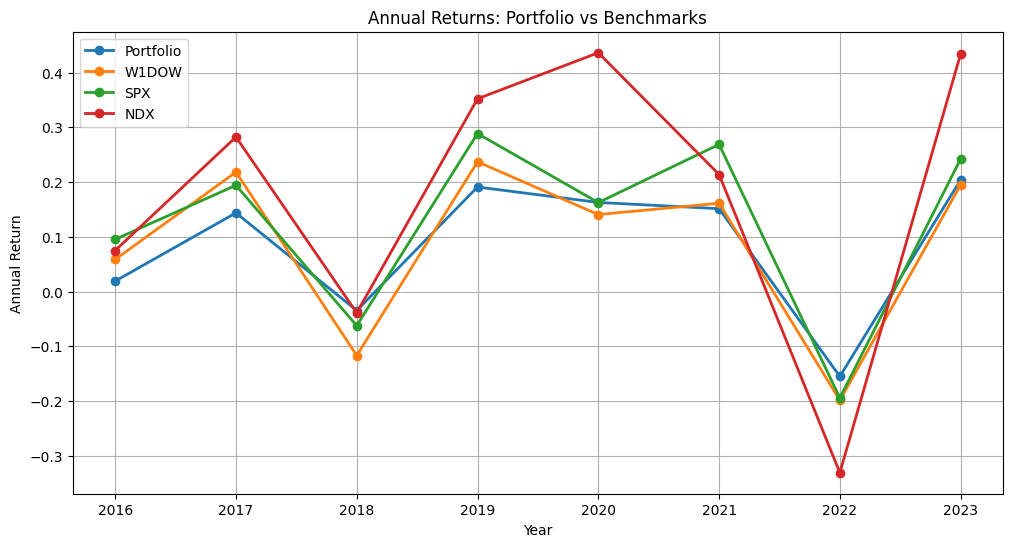

In [ ]:
portfolio_weights = np.array(weights)

# Portfolio assets
indices = [
    "BDDSESD", "DJIAP", "DJICHK", "DJIMID", "DSES", "DWDEURS",
    "GS100", "IMUS", "IMXLD", "JKIID", "JPNU", "SHX",
    "SWDPAC", "SWDPACXJ", "SWDXUS", "SWPXJAN", "WALLE", "WORLDS"
]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Calculate annual returns for portfolio
portfolio_annual_returns = []
for year_index in range(len(years)):
    weighted_return = sum(
        portfolio_weights[i] * annual_returns[asset][year_index] for i, asset in enumerate(portfolio_assets)
    )
    portfolio_annual_returns.append(weighted_return)

# Extract benchmark returns
w1dow_returns = annual_returns["W1DOW"]
spx_returns = annual_returns["SPX"]
ndx_returns = annual_returns["NDX"]

# Plotting
plt.figure(figsize=(12, 6))

# Portfolio
plt.plot(years, portfolio_annual_returns, label="Portfolio", marker="o", linewidth=2)
# Benchmarks
plt.plot(years, w1dow_returns, label="W1DOW", marker="o", linewidth=2)
plt.plot(years, spx_returns, label="SPX", marker="o", linewidth=2)
plt.plot(years, ndx_returns, label="NDX", marker="o", linewidth=2)

# Customize plot
plt.title("Annual Returns: Portfolio vs Benchmarks")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.legend()
plt.grid(True)
plt.show()